# Plot for the PIC simulation (chorus study)

## Background

1d 3V PIC simulation 
a bump of electric field to set up the whistler wave field
oblique wave


## Parameter for the code


In [1]:
folder_name = 'result4/result_4/'

time_num = 4000
mode_num = 1024
w_whistler = 0.0194

## Plot for the dispersion




### dispersion PLOT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.cm as cm
import matplotlib.colors as colors


file_name_elk = folder_name + 'elk1.88'
data_elk = np.fromfile(file_name_elk)
w_whistler = 0.0194
data_elk = data_elk.reshape(time_num,mode_num//2,2)

C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


(4000, 201)


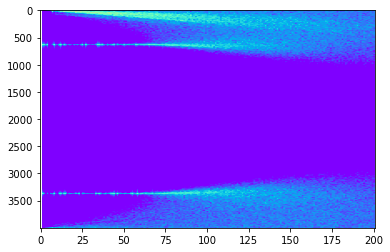

In [3]:
kmax = 200

freq = np.fft.fftfreq(4000)
EL =1j*data_elk[:,:,0] + data_elk[:,:,1]
ELKW = np.zeros((time_num,kmax+1))
for i in range(kmax+1):
    ELKW[:,i] = np.fft.fft(EL[:,i])
print(ELKW.shape)
plt.imshow((np.log10(np.absolute(ELKW)**2)),aspect='auto',vmin = -7,vmax = -1,cmap = 'rainbow')
ELKW_shift = np.vstack((ELKW[time_num//2:,1:],ELKW[0:time_num//2,1:]))

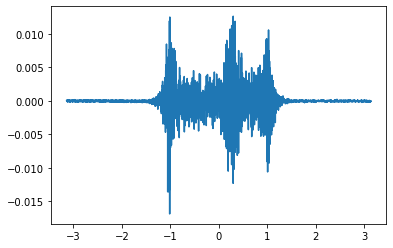

In [4]:
plt.plot(freq*2*np.pi,ELKW[:,100])

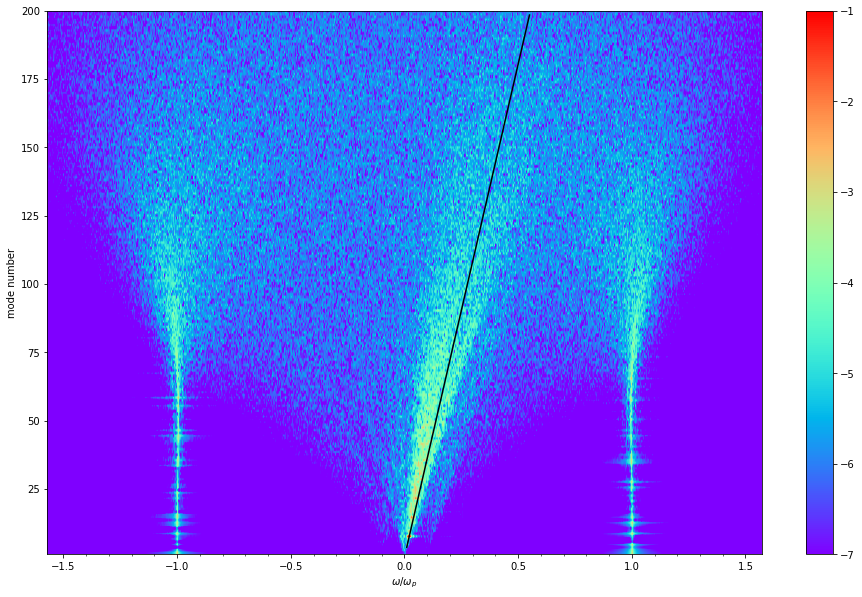

In [5]:

Z = np.log10((ELKW_shift)**2)[1000:3000,:]
x = np.arange(-np.pi/2,np.pi/2,np.pi/2000) # len = 11
xticks = np.arange(-1.6,1.6,0.1) 
y = np.arange(0, kmax, 1)  # len = 7
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize = (16,10))
dis = ax.imshow(np.flipud(Z.T),vmin = -7,vmax = -1,cmap = 'rainbow',
                extent = [-np.pi/2,np.pi/2,1,kmax],aspect='auto')
fig.colorbar(dis, ax=ax)
wplot = np.arange(0.01,200/(7/w_whistler),0.01)
disper = ax.plot(wplot,wplot*7/w_whistler,'k')
ax.set_xlabel(r'$\omega / \omega_p$')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.set_ylabel('mode number')
plt.show()

### In k_t space plot

C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


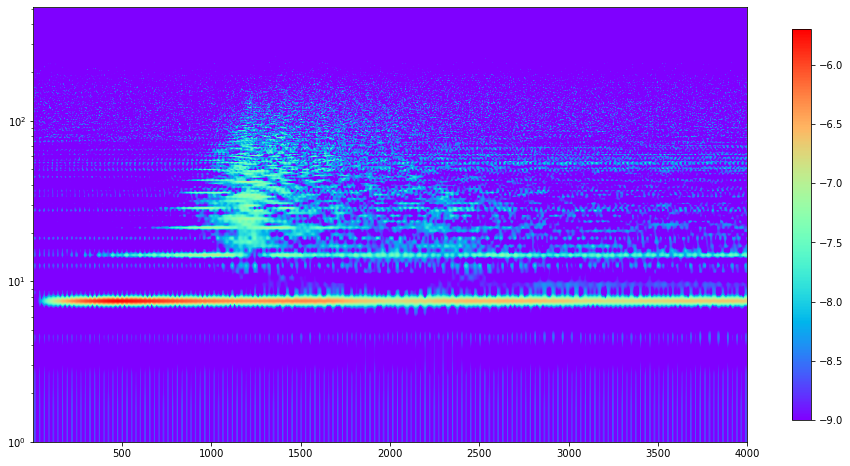

In [6]:

EL_2 = np.hypot(data_elk[:,1:,0],data_elk[:,1:,1])
Z = np.flipud(EL_2.T)

fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(np.log10(np.abs(Z)**2), cmap=cm.rainbow, extent=[1, 4000, 1,512],aspect='auto',vmin = -9)
# y_pos = np.aran

# ax.yaxis.set_major_locator(y_major_locator)
cbar = fig.colorbar(im, shrink=0.9)
plt.yscale('log')
plt.show()

### phase space density

In [7]:
file_name_fxv = folder_name + 'xv1.88'
data_fxv = np.fromfile(file_name_fxv)
print(data_fxv.shape)

TEND = 4000
DT=0.2
NTS = 100
t = TEND/DT/NTS

(41205000,)


C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


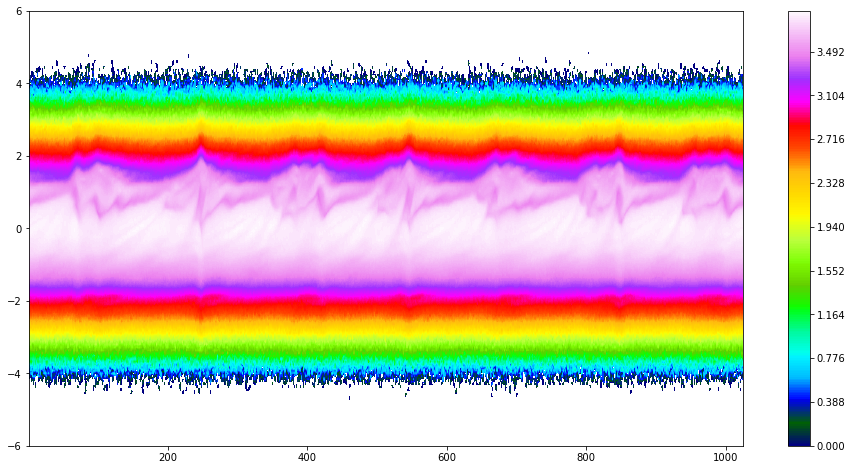

In [8]:
fxv_t = data_fxv.reshape((200,1025*201))
time_select = 60
fxv_t_specific = fxv_t[time_select]
fxv_t_specific = fxv_t_specific.reshape((201,1025))



np.random.seed(0)

uniform_data =np.log10(np.flipud(fxv_t_specific))
v = np.arange(-8.0,8.04,0.08)
x = np.arange(1.0,1026,1)
xx,vv = np.meshgrid(x,v)



fig, ax = plt.subplots(figsize=(16,8))
ph = ax.contourf(xx,vv,(np.log10(fxv_t_specific)),1000,cmap="gist_ncar")
ax.set_ylim(-6,6)

plt.colorbar(ph)
plt.show()

In [9]:
### ETK and ELK


file_name_etk = folder_name + 'etk1.88'
data_etk = np.fromfile(file_name_etk)


data_etk = data_etk.reshape(time_num,mode_num//2,2,2)

In [10]:
data_etk.shape

(4000, 512, 2, 2)

In [11]:
EL.shape

(4000, 512)

In [12]:
time_select_real =1200
#EL_x = np.fft.ifft(EL[time_select_real],n = 1024)

EL_all = data_elk


EL_all= EL_all[:,:,0] + 1j*EL_all[:,:,1] 





ET1 = data_etk[:,:,:,0]
print(ET1.shape)
ET2 = data_etk[:,:,:,1]

cs = np.cos(np.deg2rad(30))

ss = np.sin(np.deg2rad(30))

ET1 = ET1[:,:,0] + 1j*ET1[:,:,1] 


ET2 = ET2[:,:,0] + 1j*ET2[:,:,1] 





(4000, 512, 2)


<IPython.core.display.Javascript object>


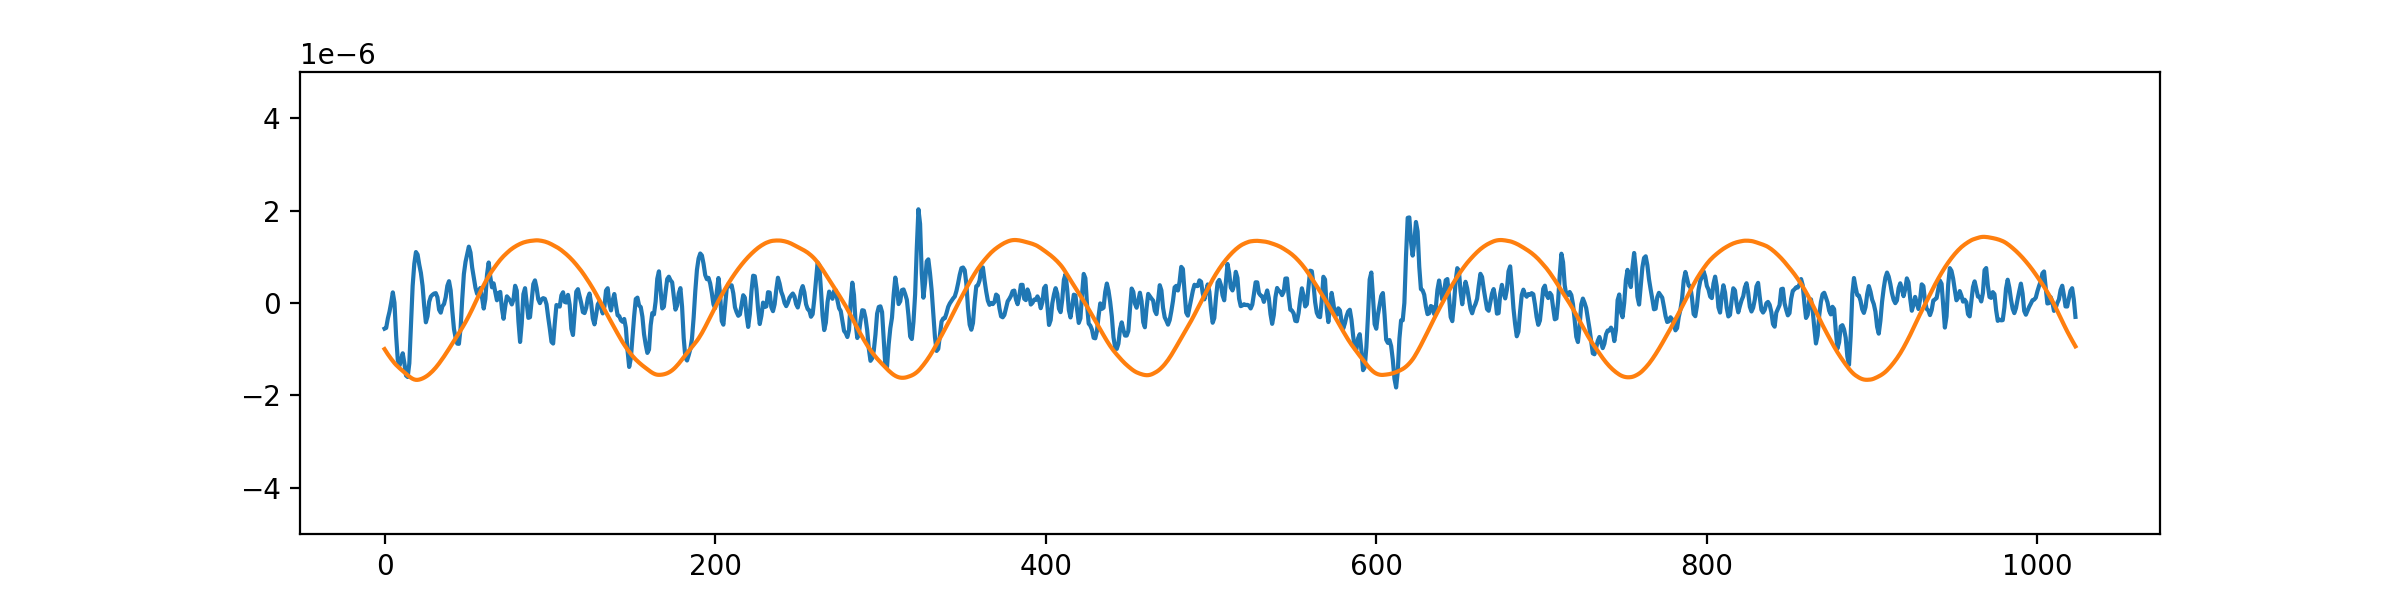

interactive(children=(IntSlider(value=10, description='time_select', max=2000, step=20), Output()), _dom_class…

In [13]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


time_selsect = 0
EL_x = np.fft.ifft(EL_all[time_select],1024)
ET1_x = np.fft.ifft(ET1[time_select],1024)
ET2_x = np.fft.ifft(ET2[time_select],1024)
#x = np.linspace(0, 2 * np.pi)
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-5e-6,5e-6)
x = range(1024)
line, = ax.plot(x,(np.array((EL_x)*cs  + ET2_x*ss).real))
line2, = ax.plot(x,(np.array((EL_x)*cs  + ET2_x*ss).real))

def update(time_select = 10):
    
    
    EL_x = np.fft.ifft(EL_all[time_select],1024)
    ET1_x = np.fft.ifft(ET1[time_select],1024)
    ET2_x = np.fft.ifft(ET2[time_select],1024)
    
    line.set_ydata((np.array((EL_x)*cs)) - np.flip(np.array((ET2_x)*ss)))
    line2.set_ydata(np.flip(np.array((ET1_x))))
    fig.canvas.draw_idle()

interact(update,time_select=(0,2000,20));